# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [68]:
# modules
import pandas as pd
%matplotlib inline  
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# my modules
%run Human_Body_Temp.py

In [69]:
# load
df = pd.read_csv('data/human_body_temperature.csv')
# change units
f = lambda F: (F - 32) * (5/9)
df['temperature'] = df.temperature.apply(f)
x = df.temperature.values

## 1. Is the distribution of body temperatures normal?
### - I ran two different tests using Scipy and they have contradictory results. 

In [70]:
# norm_tests
# change temp to celsius
# assign variable
x = df.temperature.values;
norm_tests(x); # original data

The Kolmogorov-Smirnov test indicates that the data IS normally distirbuted
The D’Agostino and Pearson’s indicates that the data is NOT normally distirbuted


In [71]:
x = df.temperature.values; norm_tests(np.log(x)); # log of data

The Kolmogorov-Smirnov test indicates that the data IS normally distirbuted
The D’Agostino and Pearson’s indicates that the data is NOT normally distirbuted


/Users/Julio/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


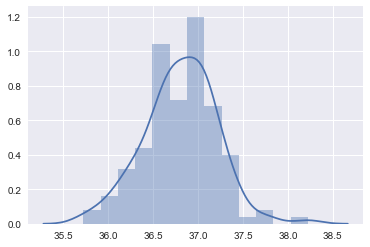

In [72]:
sns.distplot(x);

## Check if the two maximums are due to gender
### Female

In [73]:
females, males = by_gender(df)

FEMALE subjects
----------------------------------------
The Kolmogorov-Smirnov test indicates that the data IS normally distirbuted
The D’Agostino and Pearson’s indicates that the data is NOT normally distirbuted
                    
MALE subjects
                    
The Kolmogorov-Smirnov test indicates that the data IS normally distirbuted
The D’Agostino and Pearson’s indicates that the data is NOT normally distirbuted


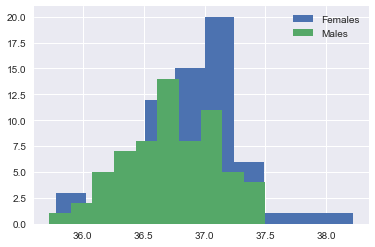

In [74]:
check_gender_effect(females,males)

## 2. Is the sample size large? Are the observations independent?
### I don't have enough information to know if the samples are indepedent, but I could assume they are (for now). On the other hand, the total number of samples (130) might not be sufficient to detect a small effect of gender on the body temperature.

## 3. Is the true population mean really 98.6 degrees F (37 celsius)? NO
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the tt or zz statistic?
- Now try using the other test. How is the result be different? Why? 

In [75]:
# t-statistic
one_sample_test(x,37.0)

The p-value for the t-statistic is: 2.41063204156e-07
We can reject the null hypothesis; The mean IS different than 37.0


### - We need to use a two sided test becuase we are interested in being different than 37.0 celsius, not just being lower or higher (we can use one-sided tests for that)
### - In general, the t-test used with samples of size less than 30 and Has a sample size below 30, and unknown population standard deviation. The z-score is also normalized, thus we can create a distribution with mean of zero and test that as our null


## Does gender has an effect?
## No, their median are still different than 37.0 C.

In [76]:
one_sample_test(females,37.0)

The p-value for the t-statistic is: 0.0288804507897
We can reject the null hypothesis; The mean IS different than 37.0


In [77]:
one_sample_test(males,37.0)

The p-value for the t-statistic is: 3.08384031732e-07
We can reject the null hypothesis; The mean IS different than 37.0


## 4. At what temperature should we consider someone's temperature to be "abnormal"?

In [78]:
# All
expected_rante(x)

The lower limit at the 95% conf. level is 36.7353776691
The upper limit at the 95% conf. level is 36.8748787411
--------------------


(36.73537766912677, 36.874878741129642)

In [79]:
# males
expected_rante(males)

The lower limit at the 95% conf. level is 36.6311411081
The upper limit at the 95% conf. level is 36.8184315415
--------------------


(36.631141108091619, 36.81843154148104)

In [80]:
# All
expected_rante(females)

The lower limit at the 95% conf. level is 36.7858300174
The upper limit at the 95% conf. level is 36.9851101535
--------------------


(36.78583001741174, 36.985110153528453)

## 5. Is the mean temperature the same for men and women?

In [81]:
men_vs_women(males,females)

The p-value for the t-statistic is: 0.0239382641829
We can reject the null hypothesis; The means ARE different


## My theory 
## Women have a slighlty higher temperature

**Note:**
We could do the same analysis using non-parametric methodsm, but that is beyond the scope of this excercise
